<a href="https://colab.research.google.com/github/polariswon/polariswon/blob/master/ML_basic_KO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝 기초


1.선형대수학


1.1. Numpy 행렬

In [ ]:
import numpy


def main():
    print(matrix_tutorial())

def matrix_tutorial():
    A = [[1,4,5,8],[2,1,7,3],[5,4,5,9]]
    return A

if __name__ =="__main__":
  main()


[[1, 4, 5, 8], [2, 1, 7, 3], [5, 4, 5, 9]]


1.2. Numpy 산술 연산자

In [ ]:
import numpy as np

def main():
    print(matrix_tutorial())

def matrix_tutorial():
    A = np.array([[1,4,5,8], [2,1,7,3], [5,4,5,9]])

    #normalize를 하는 이유: 

    people = np.array([30,70]) #남 30, 여 70
    normalized_people = people/(people[0]+people[1])# 남여 비율이 바뀌더라도 계산이 가능함.
    normalized_people = people/np.sum(people) # 남여 외에 나이, 학력등으로 행렬이 증가하더라도 ex([30,120,70])등 상관없이 정규화 가능

    # 분산
    low_var = np.array([1,0.9,1.2,1.5,0.7,1.0])
    high_var = np.array([1,10,5,-20,7,30])

    print("variance of low_var",np.var(low_var))
    print("variance of high_var",np.var(high_var))

    print(normalized_people)


    # 아래 코드를 작성하세요.
        
    C = np.sum(A)
    
    A = A*1/C
    
    B = np.var(A)

    return B

if __name__ == "__main__":
    main()

variance of low_var 0.0625
variance of high_var 215.58333333333334
[0.3 0.7]
0.0020861911294010062


1.3. Numpy 논리 연산자

In [ ]:
import numpy as np

def main():
    A = get_matrix()
    print(A)
    print(matrix_tutorial(A))
    

def get_matrix():
    mat = []
    first_row = input()
    n = int(first_row.split(' ')[0]) # input함수로 받은 변수가 숫자로 변경됨
    m = int(first_row.split(' ')[1]) # input함수로 받은 변수가 숫자로 변경됨
    for i in range(n):
        row = input()
        mat.append([int(x) for x in row.split(' ')]) # 공백으로 Split을 함
       
     
  
    return np.array(mat)
  
def matrix_tutorial(A):
    
    # 아래 코드를 완성하세요.
    B = A.T
    print(B)
    try:
        C = np.linalg.inv(B)
    except:
        return "not invertible"
    return(np.sum(C>0))
   

if __name__ == "__main__":
    main()


1 2 3
4 5 6
[[4 5 6]]
[[4]
 [5]
 [6]]
not invertible


1.4. 논리 연산자


In [ ]:
import numpy as np

def main():
    A = get_matrix()
    print(A)
    print(matrix_tutorial(A))
    

def get_matrix():
    mat = []
    first_row = input()
    n = int(first_row.split(' ')[0]) # 행의 갯수
    m = int(first_row.split(' ')[1]) # 열의 갯수
    for i in range(n):
        row = input()
        mat.append([int(x) for x in row.split(' ')])
           
  
    return np.array(mat)
  
def matrix_tutorial(A):
    
    # 아래 코드를 완성하세요.
    B = A.T
    print(B)
    try:
        C = np.linalg.inv(B)
    except:
        return "not invertible"
    return(np.sum(C>0))
   

if __name__ == "__main__":
    main()

2 2
1 2
3 4
[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
2


In [ ]:
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
import numpy as np

def circle(P):
    return np.linalg.norm(P) - 1 # 밑의 코드와 동일하게 동작합니다.
    # return np.sqrt(np.sum(P * P)) - 1
    
def diamond(P):
    return np.abs(P[0]) + np.abs(P[1]) - 1
    
def smile(P):
    def left_eye(P):
        eye_pos = P - np.array([-0.5, 0.5])
        return np.sqrt(np.sum(eye_pos * eye_pos)) - 0.1
    
    def right_eye(P):
        eye_pos = P - np.array([0.5, 0.5])
        return np.sqrt(np.sum(eye_pos * eye_pos)) - 0.1
    
    def mouth(P):
        if P[1] < 0:
            return np.sqrt(np.sum(P * P)) - 0.7
        else:
            return 1
    
    return circle(P) * left_eye(P) * right_eye(P) * mouth(P)

def checker(P, shape, tolerance):
    return abs(shape(P)) < tolerance

def sample(num_points, xrange, yrange, shape, tolerance):
    accepted_points = []
    rejected_points = []
    
    for i in range(num_points):
        x = np.random.random() * (xrange[1] - xrange[0]) + xrange[0]
        y = np.random.random() * (yrange[1] - yrange[0]) + yrange[0]
        P = np.array([x, y])
        
        if (checker(P, shape, tolerance)):
            accepted_points.append(P)
        else:
            rejected_points.append(P)
    
    return np.array(accepted_points), np.array(rejected_points)

xrange = [-1.5, 1.5] # X축 범위입니다.
yrange = [-1.5, 1.5] # Y축 범위입니다.
accepted_points, rejected_points = sample(100000, #  점의 개수를 줄이거나 늘려서 실행해 보세요. 너무 많이 늘리면 시간이 오래 걸리는 것에 주의합니다.
    xrange, 
    yrange, 
    smile, # smile을 circle 이나 diamond 로 바꿔서 실행해 보세요.
    0.005) # Threshold를 0.01이나 0.0001 같은 다른 값으로 변경해 보세요.

plt.figure(figsize=(xrange[1] - xrange[0], yrange[1] - yrange[0]), 
           dpi=150) # 그림이 제대로 로드되지 않는다면 DPI를 줄여보세요.
           
plt.scatter(rejected_points[:, 0], rejected_points[:, 1], c='lightgray', s=0.1)
plt.scatter(accepted_points[:, 0], accepted_points[:, 1], c='black', s=1)

plt.savefig("graph.png")


2.회귀 분석

2.1. 기울기와 절편

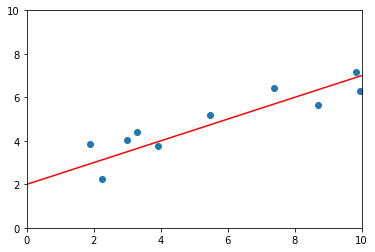

In [ ]:
import matplotlib.pyplot as plt
mpl.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

# Beta_0와 Beta_1을 변경하면서 그래프에 표시되는 선을 확인해 봄


beta_0 = 0.5   # beta_0에 저장된 기울기 값을 조정해보세요. 
beta_1 = 2 # beta_1에 저장된 절편 값을 조정해보세요.

plt.scatter(X, Y) # (x, y) 점을 그립니다.
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선을 그립니다.

plt.xlim(0, 10) # 그래프의 X축을 설정합니다.
plt.ylim(0, 10) # 그래프의 Y축을 설정합니다.

plt.savefig("test.png")

2.2. Loss function

Loss: 46.341726


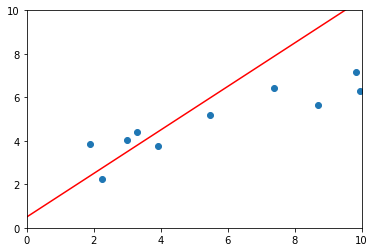

In [ ]:
import matplotlib.pyplot as plt
mpl.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def loss(x, y, beta_0, beta_1):
    N = len(x)
    
    '''
    x, y, beta_0, beta_1 을 이용해 loss값을 계산한 뒤 리턴합니다.
    
    '''
    total_loss = 0
    '''
    for i in range(N):
        y_i = y[i] #실제 y(i)
        x_i = x[i] # 실제 x(i)
        y_pre = beta_0 * x_i +beta_1
        diff = (y_i - y_pre)**2
        total_loss += diff
    '''
    x = np.array(x) # list에서 numpy로 for 안돌려도 전체 스칼라를 한번에 할 수 있음.
    y = np.array(y)
    
    y_pre = beta_0 * x + beta_1
    total_loss = np.sum((y - y_pre)**2)

    return total_loss

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

beta_0 = 1 # 기울기
beta_1 = 0.5 # 절편

print("Loss: %f" % loss(X, Y, beta_0, beta_1))

plt.scatter(X, Y) # (x, y) 점을 그립니다.
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선을 그립니다.

plt.xlim(0, 10) # 그래프의 X축을 설정합니다.
plt.ylim(0, 10) # 그래프의 Y축을 설정합니다.
plt.savefig("test.png") # 저장 후 엘리스에 이미지를 표시합니다.


2.3. Scikit-learn을 이용한 회귀 분석


beta_0: 0.430781
beta_1: 2.506181
Loss: 3.721640


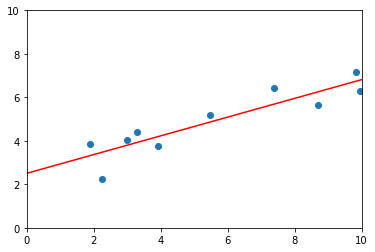

In [ ]:
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline


def loss(x, y, beta_0, beta_1):
    N = len(x)
    
    '''
    이전 실습에서 구현한 loss function을 여기에 붙여넣습니다.
    '''
    x = np.array(x)
    y = np.array(y)
    total_loss = np.sum((y-(beta_0*x+beta_1))**2)
    
    return total_loss
    
    
X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

train_X = np.array(X).reshape(-1,1) #하나의 행이 하나의 데이터를 가지고 있도록 변경
train_Y = np.array(Y).reshape(-1,1)



'''
여기에서 모델을 트레이닝합니다.
'''
lrmodel = LinearRegression()
lrmodel.fit(train_X,train_Y)

'''
loss가 최소가 되는 직선의 기울기와 절편을 계산함
'''
beta_0 = lrmodel.coef_[0]   # lrmodel로 구한 직선의 기울기
beta_1 = lrmodel.intercept_ # lrmodel로 구한 직선의 y절편

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("Loss: %f" % loss(X, Y, beta_0, beta_1))

plt.scatter(X, Y) # (x, y) 점을 그립니다.
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선을 그립니다.

plt.xlim(0, 10) # 그래프의 X축을 설정합니다.
plt.ylim(0, 10) # 그래프의 Y축을 설정합니다.
plt.savefig("test.png") # 저장 후 엘리스에 이미지를 표시합니다.

2.4. 다중회귀분석

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline
'''
./data/Advertising.csv 에서 데이터를 읽어, X와 Y를 만듭니다.

X는 (200, 3) 의 shape을 가진 2차원 np.array,
Y는 (200,) 의 shape을 가진 1차원 np.array여야 합니다.

X는 FB, TV, Newspaper column 에 해당하는 데이터를 저장해야 합니다.
Y는 Sales column 에 해당하는 데이터를 저장해야 합니다.
'''

import csv
csvreader = csv.reader(open("Advertising.csv"))

x = [] # 파이썬 리스트 형식
y = []


next(csvreader)# 한줄을 건너 뛰게 됨
for line in csvreader :
    x_i = [ float(line[1]), float(line[2]), float(line[3]) ]
    y_i = float(line[4]) ##문자열 형식으로 저장되기 때문에 float로 실수형으로 변경함.
    x.append(x_i)
    y.append(y_i)

X = np.array(x)
Y = np.array(y)

lrmodel = LinearRegression()
lrmodel.fit(X, Y)

beta_0 = lrmodel.coef_[0] # 0번째 변수에 대한 계수 (페이스북)
beta_1 = lrmodel.coef_[1] # 1번째 변수에 대한 계수 (TV)
beta_2 = lrmodel.coef_[2] # 2번째 변수에 대한 계수 (신문)
beta_3 = lrmodel.intercept_ # y절편 (기본 판매량)
print(X)
print(Y)
print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("beta_2: %f" % beta_2)
print("beta_3: %f" % beta_3)

def expected_sales(fb, tv, newspaper, beta_0, beta_1, beta_2, beta_3):
    '''
    FB에 fb만큼, TV에 tv만큼, Newspaper에 newspaper 만큼의 광고비를 사용했고,
    트레이닝된 모델의 weight 들이 beta_0, beta_1, beta_2, beta_3 일 때
    예상되는 Sales 의 양을 출력합니다.
    '''
    sales = beta_0 * fb +beta_1 *tv + beta_2 * newspaper +beta_3
    
    return sales

print("예상 판매량: %f" % expected_sales(12,200, 10, beta_0, beta_1, beta_2, beta_3))

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

'''
./data/Advertising.csv 에서 데이터를 읽어, X와 Y를 만듭니다.

X는 (200, 3) 의 shape을 가진 2차원 np.array,
Y는 (200,) 의 shape을 가진 1차원 np.array여야 합니다.

X는 FB, TV, Newspaper column 에 해당하는 데이터를 저장해야 합니다.
Y는 Sales column 에 해당하는 데이터를 저장해야 합니다.
'''

import csv

csv_reader = csv.reader(open('./Advertising.csv'))

next(csv_reader)
x=[]
y=[]
for line in csv_reader:
    x_i = [float(line[1]),float(line[2]),float(line[3])]
    y_i = float(line[4])
    
    x.append(x_i)
    y.append(y_i)
    
X = np.array(x)
Y = np.array(y)
    
    
    
# 다항식 회귀분석을 진행하기 위해 변수들을 조합합니다.
X_poly = []
for x_i in X:
    X_poly.append([
        x_i[0] * x_i[1], # X_1^2
        x_i[1] * x_i[2], # X_2
        x_i[0] **2, # X_2 * X_3
        x_i[2] * x_i[0]# X_3
    ])

# X, Y를 80:20으로 나눕니다. 80%는 트레이닝 데이터, 20%는 테스트 데이터입니다.

x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=50)

# x_train, y_train에 대해 다항식 회귀분석을 진행합니다.
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

beta_0 = lrmodel.coef_[0]
beta_1 = lrmodel.coef_[1]
beta_2 = lrmodel.coef_[2]
beta_3 = lrmodel.intercept_ 

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("beta_2: %f" % beta_2)
print("beta_3: %f" % beta_3)


'''
def expected_sales(x_i[0],x_i[1]*x_i[2],x_i[2],beta_0,beta_1,beta_2,beta_3):

    sales = beta_0 * (x_i[0]**2) + beta_1*x_i[1]+beta_2*x_i[1]*x_i[2]+beta_2*x_i[2]+beta_3
    
    
    return sales
'''    
#x_train에 대해, 만든 회귀모델의 예측값을 구하고, 이 값과 y_train 의 차이를 이용해 MSE를 구합니다.
predicted_y_train = lrmodel.predict(x_train)
mse_train = mean_squared_error(y_train, predicted_y_train)
print("MSE on train data: {}".format(mse_train))

# x_test에 대해, 만든 회귀모델의 예측값을 구하고, 이 값과 y_test 의 차이를 이용해 MSE를 구합니다. 이 값이 1 미만이 되도록 모델을 구성해 봅니다.
predicted_y_test = lrmodel.predict(x_test)
mse_test = mean_squared_error(y_test, predicted_y_test)
print("MSE on test data: {}".format(mse_test))

beta_0: 0.001341
beta_1: -0.000185
beta_2: 0.000032
beta_3: 8.308199
MSE on train data: 1.5313694510644986
MSE on test data: 0.8938102131413188
